## Proje [linki](https://www.kaggle.com/datasets/tatianasnwrt/russian-handwritten-letters)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [99]:
df = pd.read_csv("/kaggle/input/russian-handwritten-letters/all_letters_info.csv")
df

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0
...,...,...,...,...
14185,я,33,33_426.png,3
14186,я,33,33_427.png,3
14187,я,33,33_428.png,3
14188,я,33,33_429.png,3


In [125]:
df[df["label"]==1]

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0
...,...,...,...,...
7785,а,1,01_426.png,3
7786,а,1,01_427.png,3
7787,а,1,01_428.png,3
7788,а,1,01_429.png,3


In [126]:
class_label = list(df.letter.unique())
class_label[:10]

['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и']

In [128]:
import os
import shutil

data_dir = '/kaggle/input/russian-handwritten-letters/all_letters_image/all_letters_image'
output_dir = '/kaggle/working/data'

os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(data_dir):
    if filename.endswith('.png'):
        class_name = filename.split('_')[0]
        class_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
        src_path = os.path.join(data_dir, filename)
        dst_path = os.path.join(class_dir, filename)
        shutil.copy(src_path, dst_path)

In [132]:
train_path = output_dir

In [133]:
import cv2
img = cv2.imread("/kaggle/input/russian-handwritten-letters/all_letters_image/all_letters_image/33_400.png")
img.shape

(32, 32, 3)

In [134]:
height = 32
width = 32
batch_size = 64
seed = 42

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 11352 images belonging to 33 classes.
Found 2838 images belonging to 33 classes.


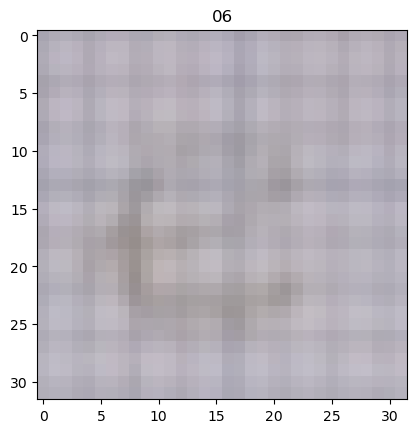

In [136]:
import matplotlib.pyplot as plt

# Veri kümesinden rastgele bir görüntü seçin
image_batch, label_batch = next(iter(train_dataset))
image = image_batch[0]
label = label_batch[0]

# Sınıf indekslerinden sınıf adlarına dönüştürme
class_names = list(train_dataset.class_indices.keys())
label = class_names[label.argmax()]

# Görüntüyü ve labelleri gösterme
plt.imshow(image)
plt.title(label)
plt.show()

In [137]:
int(class_names[label_batch[0].argmax()])

6

In [138]:
"""
type(label)
label
class_label[int(label)-1]
"{} / {}".format(label, class_label[int(label)-1])
"""

'\ntype(label)\nlabel\nclass_label[int(label)-1]\n"{} / {}".format(label, class_label[int(label)-1])\n'

## Veri Görselleştirilmesi

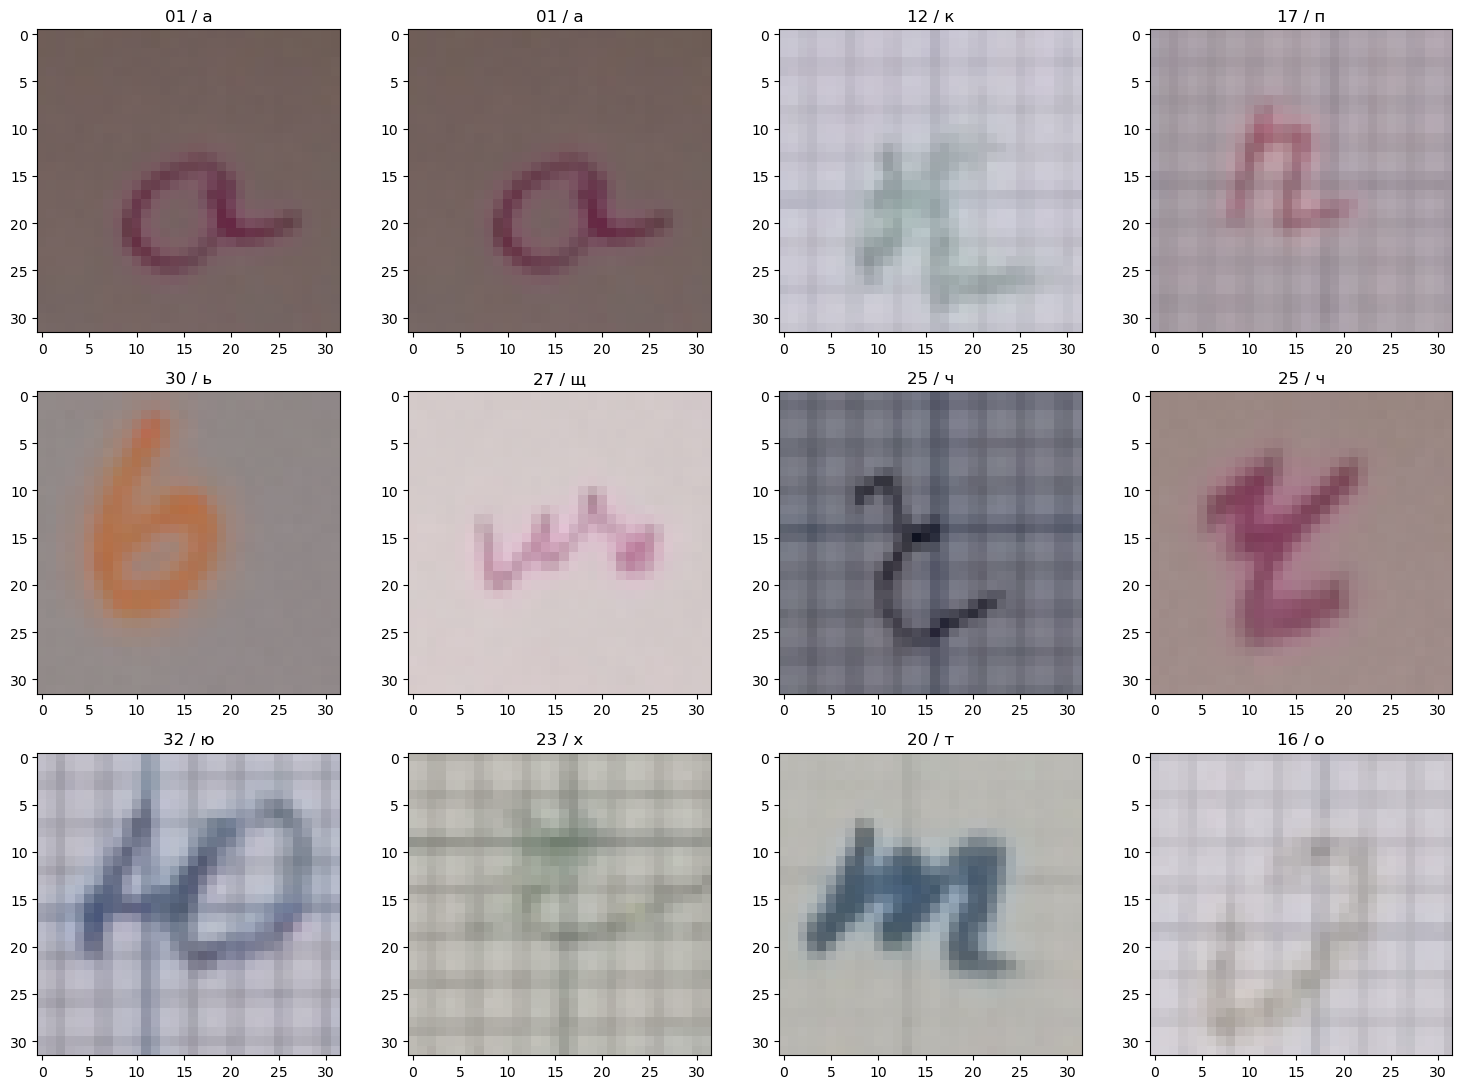

In [139]:
import random as rn
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,4)
fig.set_size_inches(15,11)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        aziz = rn.randint(0,batch_size-1)
        label = list(train_dataset.class_indices.keys())[np.argmax(y[aziz])]
        ax[i,j].imshow(img[aziz])
        ax[i,j].set_title("{} / {}".format(label, class_label[int(label)-1]))

plt.tight_layout()

# Derin Öğrenme ve CNN (Convolutional Neural Network)

In [140]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [141]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=8, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    
    keras.layers.Dense(33, activation='softmax')
])

In [142]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 28, 8)         608       
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 64)        12864     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 12, 12, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 512)       295424    
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 256)        

In [143]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [144]:
len(test_dataset)

45

In [145]:
epochs = 20
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=epochs, validation_data=test_dataset, validation_steps=len(test_dataset))

Epoch 1/20
178/178 [==============================] - 113s 622ms/step - loss: 3.5050 - accuracy: 0.0936 - val_loss: 3.8342 - val_accuracy: 0.0423
Epoch 2/20
178/178 [==============================] - 111s 621ms/step - loss: 2.2830 - accuracy: 0.3516 - val_loss: 3.3292 - val_accuracy: 0.0814
Epoch 3/20
178/178 [==============================] - 110s 619ms/step - loss: 1.2194 - accuracy: 0.6525 - val_loss: 1.6899 - val_accuracy: 0.5391
Epoch 4/20
178/178 [==============================] - 111s 623ms/step - loss: 0.7496 - accuracy: 0.7866 - val_loss: 1.1992 - val_accuracy: 0.6596
Epoch 5/20
178/178 [==============================] - 115s 646ms/step - loss: 0.5387 - accuracy: 0.8414 - val_loss: 0.9418 - val_accuracy: 0.7283
Epoch 6/20
178/178 [==============================] - 111s 623ms/step - loss: 0.4173 - accuracy: 0.8774 - val_loss: 1.5283 - val_accuracy: 0.5662
Epoch 7/20
178/178 [==============================] - 111s 621ms/step - loss: 0.3174 - accuracy: 0.9066 - val_loss: 1.2375 -

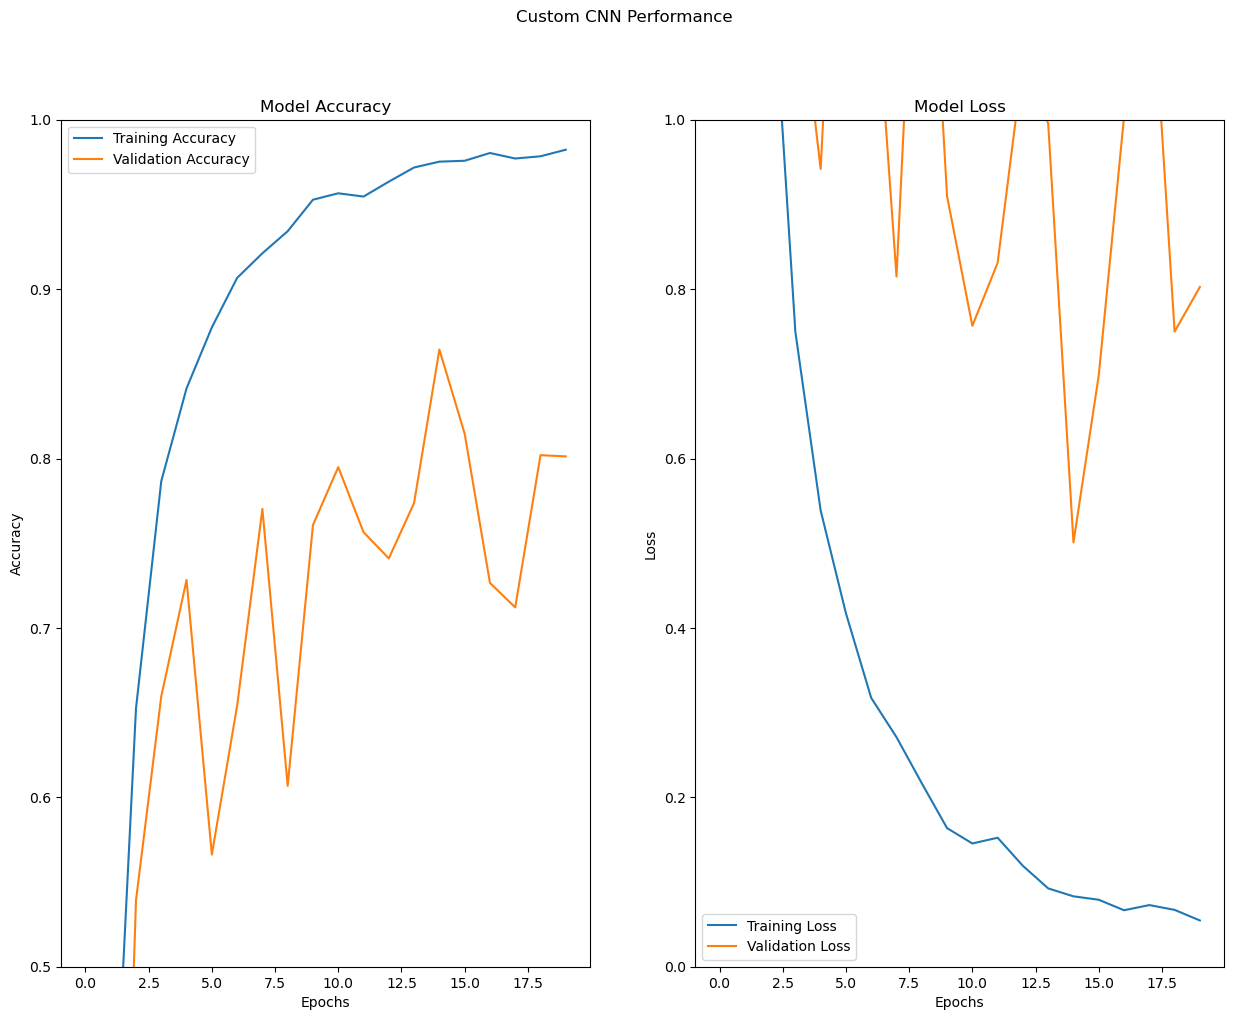

<Figure size 1000x700 with 0 Axes>

In [156]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,11)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [157]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)  # En yüksek olasılıklı sınıfın indekslerini alır
predictions = predictions.astype(int)  # int tipine dönüştürür

45/45 [==============================] - 6s 132ms/step


In [159]:
predictions

array([ 5,  8, 24, ...,  4, 29, 25])

2/2 [==============================] - 0s 84ms/step


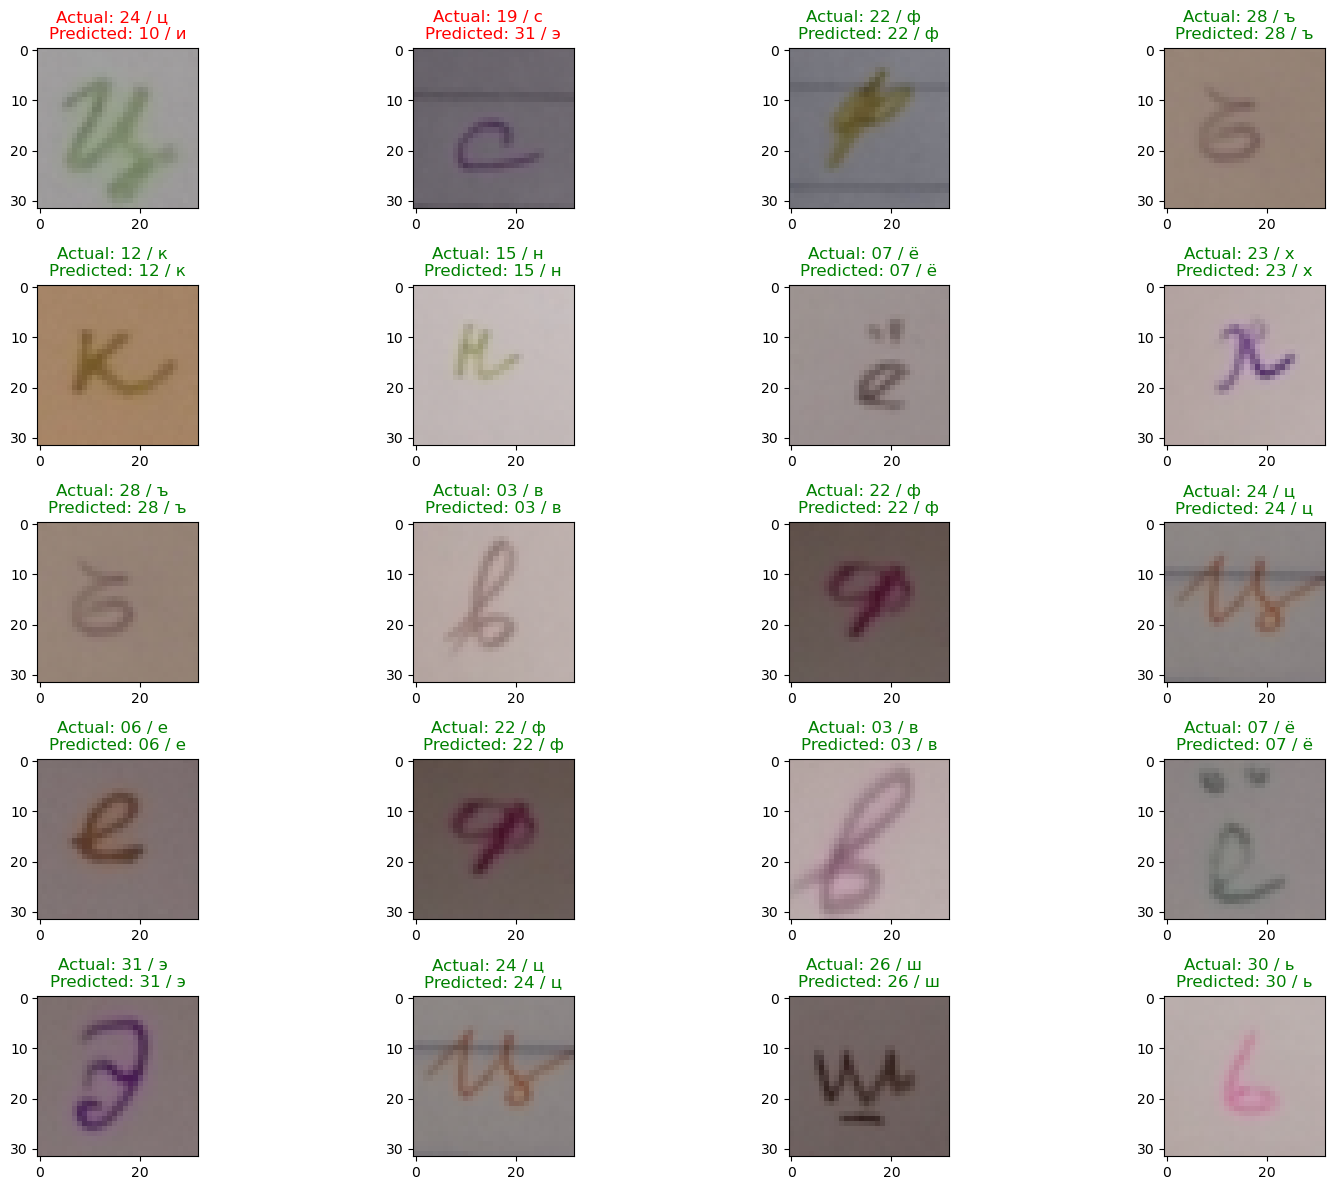

In [158]:
def map_pred(pred):
    return [list(train_dataset.class_indices.keys())[i] for i in pred]

a = 5
b = 4

fig,ax=plt.subplots(a,b)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(a):
    for j in range (b):
        aziz = rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[aziz])
        if labels[aziz] == predicts[aziz]:
            ax[i,j].set_title('Actual: ' + "{} / {}".format(labels[aziz], class_label[int(labels[aziz])-1]) +
                              '  \nPredicted: ' + "{} / {}".format(predicts[aziz], class_label[int(predicts[aziz])-1]), color = 'green')
        else: 
            ax[i,j].set_title('Actual: ' + "{} / {}".format(labels[aziz], class_label[int(labels[aziz])-1]) +
                              '  \nPredicted: ' + "{} / {}".format(predicts[aziz], class_label[int(predicts[aziz])-1]), color = 'red')

plt.tight_layout()